# Inaugural Project

The project is composed of this notebook along with a py-file (inauguralproject.py) and a README.md

# The model and key concepts

In this model for an Exchange Economy we have two consumers, A and B, whose consumption and endowment we will calculate in different scenarios. The results are all being presented in our Notebook further down. At first we highlight some of the key concepts of the model.

$$
\begin{align*}
\omega_{1}^{B} & = 1 - \omega_{1}^{A} \\
\omega_{2}^{B} & = 1 - \omega_{2}^{A} \\
\end{align*}
$$
We note, that the combined endowment of the two consumers sum to one. Hence they cannot consume more than they have combined, which is one. Therefore we would not expect results for consumption, where single consumptions exceeds this.

Consumer A:
$$
\begin{align*}
u^A(x_1,x_2) & = x_1^{\alpha} x_2^{1-\alpha}, \alpha \in (0,1) \\
x_1^{A^\star}(p,\omega^A) & = \alpha \left( \frac{p_1\omega^A_1 + p_2\omega^A_2}{p_1} \right) \\
x_2^{A^\star}(p,\omega^A) & = (1-\alpha) \left( \frac{p_1\omega^A_1 + p_2\omega^A_2}{p_2} \right) \\
\end{align*}
$$

Consumer B:
$$
\begin{align*}
u^B(x_1,x_2) & = x_1^{\beta} x_2^{1-\beta}, \beta \in (0,1) \\
x_1^{B^\star}(p,\omega^B) & = \beta \left( \frac{p_1\omega^B_1 + p_2\omega^B_2}{p_1} \right) \\
x_2^{B^\star}(p,\omega^B) & = (1-\beta) \left( \frac{p_1\omega^B_1 + p_2\omega^B_2}{p_2} \right) \\
\end{align*}
$$

We note, that both consumers have Cobb-Douglas utility functions with the fixed parameters $\alpha = \frac{1}{3}$ and $\beta = \frac{2}{3}$. As both $\alpha$ and $\beta$ are between 0 and 1 it indicates diminishing marginal utility for each good as more of the specific good is consumed. We also note, that from their preferences, consumer A values good 2 relatively more than good 1. The reverse applies to consumer B. Lastly, one consumer consuming everything would imply a maximum utility of that consumer of 1. We suspect, that the sum of the two consumers utilities can exceed 1, if the goods are divided so that they each get more of their prefered good, respectively (good 2 for consumer A and good 1 for consumer B).

The Walras market clearing equilibrium are expressed as follows for both goods:
$$
\begin{align*}
x_1^{A^\star}(p,\omega^A) + x_1^{B^\star}(p,\omega^B) & = \omega_{1}^{B} + \omega_{1}^{A} \\
x_2^{A^\star}(p,\omega^A) + x_2^{B^\star}(p,\omega^B) & = \omega_{2}^{B} + \omega_{2}^{A} \\
\end{align*}
$$
As noted in the text, Walras’ law appliy, so if one market clears, the other one does as well. From the equations we can see, that this happens, when an amount equal to the two consumers endowments are consumed implying a combined consumption of each good of 1.

Lastly we have, that the numeraire price is $p_2 = 1$


# Imports and setup

In [35]:
#We start by importing different modules, setting up and importing the class from our py-file (inauguralproject)
import numpy as np
from types import SimpleNamespace
import matplotlib.pyplot as plt
from scipy import optimize

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

from inauguralproject_new import ExchangeEconomyClass #From our py-file

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

As described above, from the model we have, that consumer A prefers good 2 realtive to good 1 in the same way, that consumer B prefers good 1 to good 2. Thus, as we are to illustrate the combinations of $x_1^{A}$ and $x_2^{A}$ according to C:
$$
\begin{align*}
C = \left\{ 
(x^A_1, x^A_2) \; \middle| \; 
 
\begin{aligned}
&u^A(x^A_1, x^A_2) \geq u^A(\omega^A_1, \omega^A_2) \\
&u^B(x^B_1, x^B_2) \geq u^B(\omega^B_1, \omega^B_2) \\
&x^B_1 = 1 - x^A_1, \; x^B_2 = 1 - x^A_2 \\
&x^A_1 ,x^A_2 \in \{0, \frac{1}{N}, \frac{2}{N}, \ldots, 1\}, \; N = 75
\end{aligned}

\right\}
\end{align*}
$$

We suspect, that the allocation of the pareto efficient area will be "skeewed" towards sets of $x_1^{A}$ and $x_2^{A}$ such that consumer A for relative more cases consumes more of x2 than of x1, while the opposite is the case for consumer B.

In [36]:
# In our py-file we have been setting up the code needed to construct the Edgeworth box further down

model = ExchangeEconomyClass()  # We initialize the class

# We call the function from our py-file, that defines the points in the edgeworth box
possible_x1A, possible_x2A = model.edgeworth_q1()

# We print the first 3 points for x1A and x2A in the edgeworth box
print(f'First 3 points of [x1A, x2A] = [{", ".join([f"{x:.4f}" for x in possible_x1A[:3]])}], [{", ".join([f"{x:.4f}" for x in possible_x2A[:3]])}]')

First 3 points of [x1A, x2A] = [0.0800, 0.0933, 0.0933], [0.9600, 0.8800, 0.8933]


We see, that these points above fit with the top left points depicted in the edgeworth box plotted below with the plot_edgeworth_q1 function from our py-file.

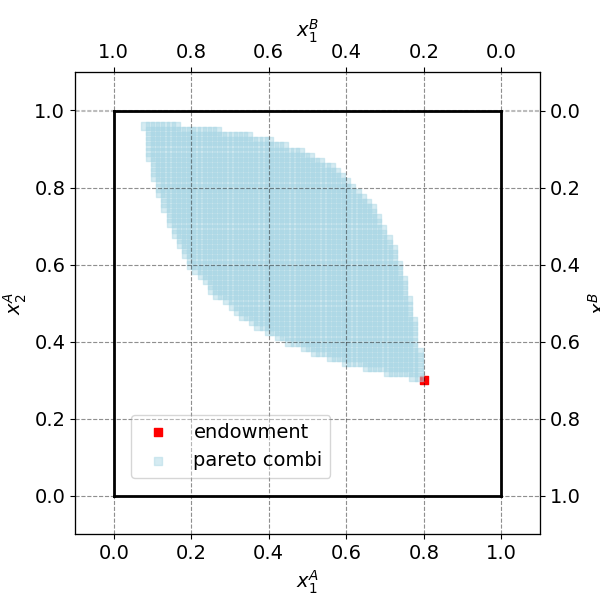

In [37]:
model.plot_edgeworth_q1(possible_x1A, possible_x2A) # the function adds the endowment as a red square

Key take away: we see from the depiction, that the combination of pareto efficient combinations is distributed towards more solutions of consumer A consuming relatively more of good 2 and the opposite for consumer B. We see, that all combinations satisfy, that the two consumers cannot consume more than the total endowments.

# Question 2

The errorterm for the consumption of each good is defined by:
$$
\begin{align*}
\varepsilon_1(p,\omega) = x^{A^\star}_1(p,\omega^A) - \omega^A_1 + x^{B^\star}_1(p,\omega^B) - \omega^B_1 \\
\varepsilon_2(p,\omega) = x^{A^\star}_2(p,\omega^A) - \omega^A_2 + x^{B^\star}_2(p,\omega^B) - \omega^B_2 \\
\end{align*}
$$
for $p_1 \in P_1 = \left\{0.5, 0.5 + \frac{2\times 1}{N}, 0.5 + \frac{2 \times 2}{N}, \ldots, 2.5\right\}$

In this case we can interpret these errorterms as the sum of discrepancy between optimal consumption for each consumer and their initial endowments. If the error term for a good is positive, it means that the consumers consumption exceeds exceeds their initial endowment of that good. This suggests that the consumers desires to consume more of the good than they currently possess. On the other hand, if the error term is negative, it means that the sum of the consumers' optimal consumption of the good is less than their initial endowment. In this case, they may have excess of the good relative to their preferences.

First five values in err1 = ['0.53333', '0.47595', '0.42410', '0.37701', '0.33407']
First five values in err2 = ['-0.26667', '-0.25067', '-0.23467', '-0.21867', '-0.20267']
Type of p1: <class 'list'>
Type of err1: <class 'list'>
Type of err2: <class 'list'>


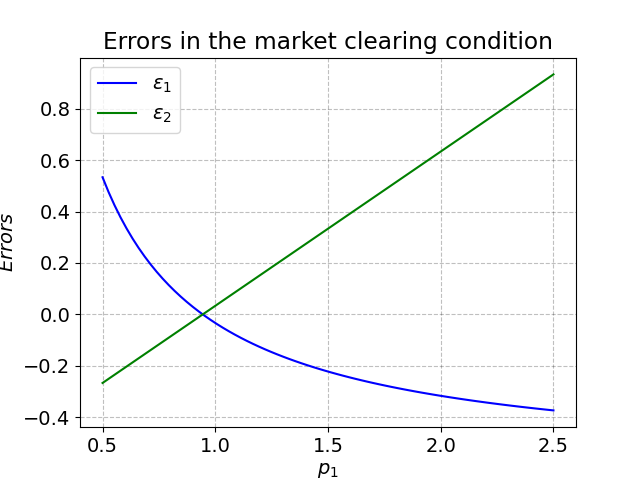

In [38]:
model.market_clear_q2()

Key take away: from plotting the size of the error terms, we can see, that the error terms intersect and are zero for a price of p1 a little less than 1.

# Question 3

Continuing on from the key take away in question 2, we expect, that the market clearing price in the market equilibrium, will be close to the price for the intersection of the error terms above. This should be so, since a point where these error terms are eliminated or significantly minimized, consumers are adjusting their consumption patterns through trade to achieve their desired allocations relative to their endowments.

In [39]:
#According to the function defined in our py-file, we need an initial guess for the root-optimizer
p1_guess = 1.0

# We call the function to find the market clearing price and print the results as given in the function in the py-file
market_clear_p1_q3, x1A_q3, x2A_q3, x1B_q3, x2B_q3 = model.market_clearing_price_q3(p1_guess)

print(f'Market clearing price: p1 = {market_clear_p1_q3:.3f}')
print(f'x1A = {x1A_q3:.3f}, x2A = {x2A_q3:.3f}')
print(f'Utility for A = {model.utility_A(x1A_q3, x2A_q3):.3f}')
print(f'x1B = {x1B_q3:.3f}, x2B = {x2B_q3:.3f}')
print(f'Utility for B = {model.utility_B(x1B_q3, x2B_q3):.3f}')

Market clearing price: p1 = 0.944
x1A = 0.373, x2A = 0.704
Utility for A = 0.569
x1B = 0.627, x2B = 0.296
Utility for B = 0.489


Key take away: we find a market clearing price for p1 of 0.944, which supports the graphical depiction of the error terms that we found in question 2. We see, that for this price, consumer A will consume relatively more of good two (which is prefered by A) than consumer B will consume of good one (which is prefered by B), resulting in a higher utility for A than B.

# Question 4

When consumer A in 4a is now allowed to set the price to maximize her own utility so: $max \, u^A\left(1 - x^B_1(p, \omega^B), 1 - x^B_2(p, \omega^B)\right)$ for $p_1 \in P_1$ we will expect, that she will set the price, so that the good she prefers (good 2) becomes relatively cheaper (the price of p1 increases compared to previously) resulting in a higher utility for consumer A.

When consumer A in 4b is allowed to do the same but for any p1 > 0, so: $max \, u^A\left(1 - x^B_1(p, \omega^B), 1 - x^B_2(p, \omega^B)\right)$ for $p_1 > 0$, we expect to see a solution where she is at least as well of utilitywise.

In [40]:
#Question 4a

# We define the discrete set P1 as grid_p1
N = model.par.N
grid_p1_q4a = np.linspace(0.5, 2.5, N+1) 

p1_q4a, uA_q4a, x1A_q4a, x2A_q4a = model.max_uA_q4a(grid_p1_q4a)

print(f'The price is: {p1_q4a:.5f} resulting in the utility: {uA_q4a:.8f}')
print(f'This amount of goods obtained for the given price above is: x1A = {x1A_q4a:.5f} and x2A = {x2A_q4a:.5f}')


The price is: 1.88667 resulting in the utility: 0.63361599
This amount of goods obtained for the given price above is: x1A = 0.61932 and x2A = 0.64089


In [41]:
#Question 4b

# We define a set of p1 larger than 0 (but up to 10000)
N = 100000
grid_p1_q4b = np.linspace(0.001, 100000, N) 

p1_q4b, uA_q4b, x1A_q4b, x2A_q4b = model.max_uA_q4a(grid_p1_q4b)

print(f'Optimal p1: {p1_q4b:.5f}, Maximum utility for A: {uA_q4b:.8f}')
print(f'x1A = {x1A_q4b:.5f}, x2A = {x2A_q4b:.5f}')


Optimal p1: 2.00102, Maximum utility for A: 0.63332764
x1A = 0.63345, x2A = 0.63327


Key take away: We see, that she recieves a slightly higher utility from a marginally higher price. However, she will achieve that by consuming marginally more of good 1 and marginally less of good 2.

# Question 5

For consumer A choosing the consumption of consumer B (though not worse of than the initial endowment), we expect that A will choose a combination of goods for herself, that will increase her utility compared to before, as she can now distribute the goods for B.
We expect that the initial utility for A should be slightly lower, when x1A and x2A are restricted to C.

In [42]:
# Question 5a

x1 = possible_x1A
x2 = possible_x2A

x1A_q5a, x2A_q5a, uA_q5a = model.marketmaker_q5a(x1,x2)

print(f'Maximum utility for A: {uA_q5a:.5f}')
print(f'x1A = {x1A_q5a:.5f}, x2A = {x2A_q5a:.5f}')

Maximum utility for A: 0.74155
x1A = 0.56000, x2A = 0.85333


In [43]:
#Question 5b
# See the py-file. We use same approach as in 5a, but this time with x1A and x2A [0,1] - set with bounds in the model.

uA_q5b, uB_q5b, xA_q5b, xB_q5b = model.marketmaker_q5b(init_guess=[0.9,0.9])
print(f'Optimal allocation for consumer A: x1A = {xA_q5b[0]:.6f}, x2A = {xA_q5b[1]:.6f}')
print(f'Resulting utility for consumer A: {uA_q5b:.6f}')
print(f'Optimal allocation for consumer B: x1B = {xB_q5b[0]:.6f}, x2B = {xB_q5b[1]:.6f}')
print(f'Resulting utility for consumer B: {uB_q5b:.6f}')

Optimal allocation for consumer A: x1A = 0.575745, x2A = 0.844438
Resulting utility for consumer A: 0.743228
Optimal allocation for consumer B: x1B = 0.424255, x2B = 0.155562
Resulting utility for consumer B: 0.303659


In [44]:
#We want to create a 3d figure to vizualize whether, we could find the optimal allocation for consumer A.
# First we create a mesh of combinations of utility for x1 and x2 values

N = model.par.N

x_max = 1

def objective_function(x1A, x2A): #We take out the objective function from the py-file, as it has been created localy.
    return -model.utility_A(x1A, x2A) 

# We create numbers distributed evenly between 0 and x_max - in this case 1 as the x-values are [0,1]
x_vec = np.linspace(0,x_max,N)

# we create meshgrids to define the area 
x1_mesh,x2_mesh = np.meshgrid(x_vec,x_vec,indexing='ij')

print('Dimension of grid over x1 (same as x2): ', x1_mesh.shape)
u_values_mesh = -objective_function(x1_mesh, x2_mesh) #we take the negative to the objective function as we are minimizing.

#print(u_values_mesh)
#print(x_vec)
#print(x2_mesh)

Dimension of grid over x1 (same as x2):  (75, 75)


In [45]:
#We then want to store the values, where the constraint returns a positive number/holds

matrix = np.ones((N,N)) + np.nan

for i,x1 in enumerate(x_vec): #we loop through rows and columns where it holds
    for m,x2 in enumerate(x_vec):
        var = model.utility_B(1 - x1, 1 - x2) - model.utility_B(model.par.w1B, model.par.w2B)
        if var > 0:
            matrix[i,m] = True

print(matrix)

[[ 1.  1.  1. ... nan nan nan]
 [ 1.  1.  1. ... nan nan nan]
 [ 1.  1.  1. ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


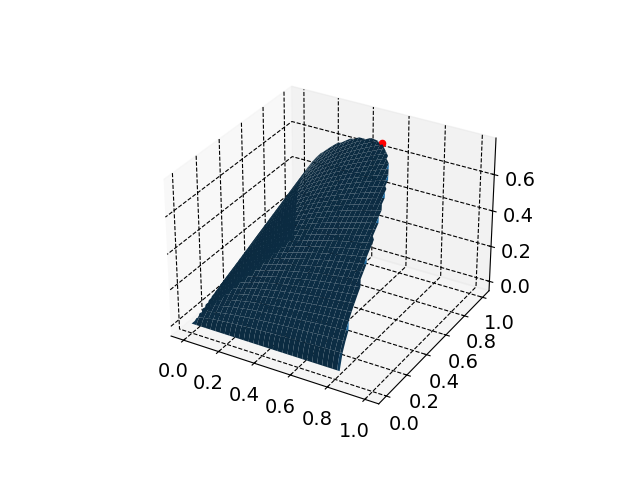

In [46]:
u_val_const = matrix * u_values_mesh #Here we get the utility values, where the constraint holds, so we can plot out result from 5b and see

#we can now plot the result we got from above
%matplotlib widget
fig = plt.figure() # create the figure
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d type axis 
ax.plot_surface(x1_mesh,x2_mesh,u_val_const); # create surface plot in the axis
ax.scatter(xA_q5b[0],xA_q5b[1],model.utility_A(xA_q5b[0],xA_q5b[1]), color='red')
# note: fig.add_subplot(a,b,c) creates the c'th subplot in a grid of a times b plots

Key take away: We see, that consumer A ensures, that she herself is better of. The resulting utility from 5a is marginaly smaller than in 5b. This makes sense, as consumer A can choose from more combinations of x1A and x2A in 5b, than in 5a, where N = 75.

# Question 6

The social planner aims to maximize the total utility by selecting consumption levels for A and B, considering the available supply (initial endowments). We import the model from inaguralproject.py file and use it to derive the solution.

In [47]:
# Question 6a

xA_q6a, xB_q6a, uA_q6a, uB_q6a = model.socialplanner_q6a(init_guess=[0.9,0.9])
print(f'Optimal allocation for consumer A: x1A = {xA_q6a[0]:.3f}, x2A = {xA_q6a[1]:.3f}')
print(f'Resulting utility for consumer A: {uA_q6a:.3f}')
print(f'Optimal allocation for consumer B: x1B = {xB_q6a[0]:.3f}, x2B = {xB_q6a[1]:.3f}')
print(f'Resulting utility for consumer B: {uB_q6a:.3f}')


Optimal allocation for consumer A: x1A = 0.333, x2A = 0.667
Resulting utility for consumer A: 0.529
Optimal allocation for consumer B: x1B = 0.667, x2B = 0.333
Resulting utility for consumer B: 0.529


To illustrate the results in question 4, 5, and 6, we plot each allocation pair within the same Edgeworth box from question 1.

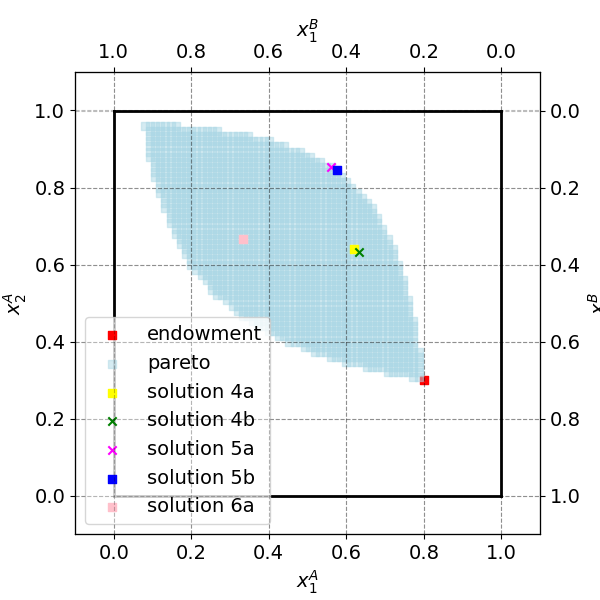

In [48]:
x1_q1 = possible_x1A
x2_q1 = possible_x2A
x1_q4a = x1A_q4a
x2_q4a = x2A_q4a
x1_q4b = x1A_q4b
x2_q4b = x2A_q4b
x1_q5a = x1A_q5a
x2_q5a = x2A_q5a
x1_q5b = xA_q5b[0]
x2_q5b = xA_q5b[1]
x1_q6a = xA_q6a[0]
x2_q6a = xA_q6a[1]

model.plot_results_q6b(x1_q1, x2_q1, x1_q4a, x2_q4a, x1_q4b, x2_q4b, x1_q5a, x2_q5a, x1_q5b, x2_q5b,x1_q6a, x2_q6a)

Upon comparing the outcomes, we observe that all of them fall within the confines of the Edgeworth box, indicating that no individual is worse off than their initial endowment. Notably, there is an overlap between solutions 4a and 4b due to their close proximity. Consequently, only the green color is visible for solution 4b and the purple color falls behind the green color. 

Key take away: The distinctive feature of the solution in  question 5 is their placement on the upper (right) boundary of the Pareto improvement space relative to the initial endowments. This indicates scenarios where consumer B's allocations are minimized without compromising their utility compared to the initial state. In contrast, the two solutions from question 6a and 4 exhibit a more balanced distribution of allocations, resulting in greater overall efficiency in terms of aggregate utility. Since consumer A is the market maker in question 5 this solution assigns fewer units of each good to consumer B compared to the social planner solution in question 6, as it prioritizes maintaining the integrity of the initial endowment.

# Question 7

To illustrate the set "W," we generate 50 random values from a uniform distribution ranging between 0 and 1 and plot them.

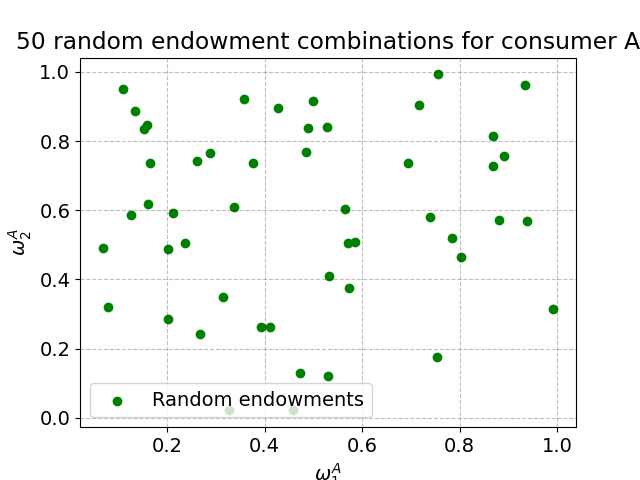

In [49]:
#We set the seed and generate 50 random variables to plot
np.random.seed(2000)
omega1A = np.random.uniform(low=0,high=1,size=50)
omega2A = np.random.uniform(low=0,high=1,size=50)

# We create the plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(omega1A, omega2A, color='green', label='Random endowments')

ax.set_title('50 random endowment combinations for consumer A')
ax.set_xlabel('$\omega_{1}^{A}$')
ax.set_ylabel('$\omega_{2}^{A}$')
ax.legend(loc='lower left');

In the figure above illustates the 50 random combinations of endowment for consumer A

# Question 8

We're facing difficulties getting the code to function properly.

This message is directed to those providing feedback. Could you please assist us with the code below? We're encountering an issue where the loop fails to iterate over the lists for wA1 and wA2, and we suspect the problem lies here.

Once we've successfully derived the solution, we intend to illustrate it in the figure corresponding to question 7.

Thank you for your assistance.

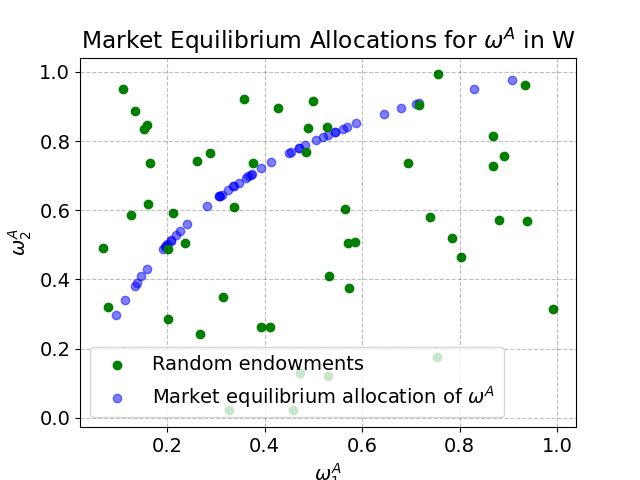

In [50]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

market_EQ = []

for w1A, w2A in zip(omega1A, omega2A):
    # We initialize the model with new endowments
    model.par.w1A = w1A
    model.par.w2A = w2A
    model.par.w1B = 1 - w1A
    model.par.w2B = 1 - w2A

    # Find the market clearing price and allocations
    try:
        market_clear_p1, x1A, x2A, x1B, x2B = model.market_clearing_price_q3(p1_guess=1.0)
        market_EQ.append((x1A, x2A, x1B, x2B))

        # Plot the equilibrium allocation for consumer A
        ax.scatter(x1A, x2A, color='blue', alpha=0.5)
    except ValueError:
        print(f"Market clearing price not found for endowment: w1A={w1A}, w2A={w2A}")

# Plot the random endowments
ax.scatter(omega1A, omega2A, color='green', label='Random endowments')
ax.scatter([], [], color='blue', alpha=0.5, label='Market equilibrium allocation of $\omega^{A}$ ')

ax.set_title('Market Equilibrium Allocations for $\omega^{A}$ in W')
ax.set_xlabel('$\omega_{1}^{A}$')
ax.set_ylabel('$\omega_{2}^{A}$')
ax.legend(loc='lower left')
plt.show()

Conclusion: